# Project \#4: Find the “Largest” Digit

## Part 1 : Data preprocessing

#### Imports

In [1]:
%matplotlib inline

In [3]:
import pandas, numpy as np
import matplotlib.pyplot as plt
import scipy.misc # to visualize only

In [26]:
!ls ./Datasets

sample_x.csv  sample_y.csv  train_x.csv  train_y.csv


In [27]:
!head -n 20 Datasets/train_x.csv > Datasets/sample_x.csv
!head -n 20 Datasets/train_y.csv > Datasets/sample_y.csv

#### Read Data to Numpy

In [28]:
x = np.loadtxt("Datasets/sample_x.csv", delimiter=",") # load from text 
y = np.loadtxt("Datasets/sample_y.csv", delimiter=",") 
x = x.reshape(-1, 64, 64) # reshape 
y = y.reshape(-1, 1) 
scipy.misc.imshow(x[0]) # to visualize only 

/home/angus/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: `imshow` is deprecated!
`imshow` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``matplotlib.pyplot.imshow`` instead.


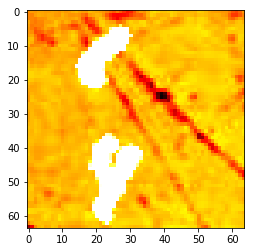

In [32]:
plt.imshow(x[0], cmap='hot', interpolation='nearest')

#### Filter only for black pixels

In [39]:
BLACK_THRES = 255.0
binX = np.floor_divide(x[0], BLACK_THRES)
binCoords = np.nonzero(binX)

In [48]:
binCoords = zip(*binCoords)

In [236]:
PIX_DISTANCE = 3
def groupPoints(binCoords):
    groups = []
    for pt in binCoords:
        distances = np.array([
            np.absolute(np.subtract(grp, pt)).sum(axis=1).min()
            for grp in groups
        ])
        withInPixDist = np.where(distances < PIX_DISTANCE)[0]
        if(len(withInPixDist)==0):
            # no groups are within pixel distance
            groups.append([pt])
        else:
            groups[np.argmin(distances)].append(pt)
            # handle grouping groups
            if len(withInPixDist) > 1:
                # current point joins 2 groups
                #print 'Grouping with ', withInPixDist
                print groups[withInPixDist[0]], '+', groups[withInPixDist[1]]
                groups[withInPixDist[0]] = groups[withInPixDist[0]] + groups[withInPixDist[1]]
        print 'pt', pt, 'distances', distances, 'withInPixDist',withInPixDist
        #print groups
    return groups

In [237]:
grps = groupPoints(binCoords[:100])

pt (5, 25) distances [] withInPixDist []
pt (5, 26) distances [1] withInPixDist [0]
pt (5, 27) distances [1] withInPixDist [0]
pt (5, 28) distances [1] withInPixDist [0]
pt (5, 29) distances [1] withInPixDist [0]
pt (6, 24) distances [2] withInPixDist [0]
pt (6, 25) distances [1] withInPixDist [0]
pt (6, 26) distances [1] withInPixDist [0]
pt (6, 27) distances [1] withInPixDist [0]
pt (6, 28) distances [1] withInPixDist [0]
pt (6, 29) distances [1] withInPixDist [0]
pt (7, 24) distances [1] withInPixDist [0]
pt (7, 25) distances [1] withInPixDist [0]
pt (7, 26) distances [1] withInPixDist [0]
pt (7, 27) distances [1] withInPixDist [0]
pt (7, 28) distances [1] withInPixDist [0]
pt (7, 29) distances [1] withInPixDist [0]
pt (8, 21) distances [4] withInPixDist []
pt (8, 22) distances [3 1] withInPixDist [1]
[(5, 25), (5, 26), (5, 27), (5, 28), (5, 29), (6, 24), (6, 25), (6, 26), (6, 27), (6, 28), (6, 29), (7, 24), (7, 25), (7, 26), (7, 27), (7, 28), (7, 29)] + [(8, 21), (8, 22), (8, 23)]


In [238]:
len(grps)

4

#### Create groupings and bounds of black pixels

#### Reshape identified numbers into standard shape

#### Implement the Neural Network

#### Define Preprocessing to Train NN pipeline